In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Combined Data

In [ ]:
import pandas as pd
import os
from google.colab import drive
from google.colab import files

# Path ke direktori file Excel di Google Drive
file_path = "/content/drive/MyDrive/INTERNSHIP2/DATASET/DATA MENTAH/"

# Kolom yang diambil
required_columns = [
    "nm_divre", "nm_bu", "tgl_bbk_normal", "kd_armada", "kd_item", "nm_item",
    "jumlah", "harga_satuan", "total_harga", "nm_merek_item",
    "nm_merek_armada", "umur_armada", "tahun_armada", "nm_segment"
]

all_dataframes = []

# Loop semua file di folder
for filename in os.listdir(file_path):
    if filename.lower().endswith((".xlsx", ".xls")):
        file_full_path = os.path.join(file_path, filename)
        try:
            df = pd.read_excel(file_full_path, engine='openpyxl')

            missing = [col for col in required_columns if col not in df.columns]
            if missing:
                print(f"⚠️ File '{filename}' kehilangan kolom: {missing}. Lewati.")
                continue

            df_subset = df[required_columns].copy()
            all_dataframes.append(df_subset)
            print(f"✅ File '{filename}' diproses.")
        except Exception as e:
            print(f"❌ Gagal memproses '{filename}': {e}")

# Gabungkan dan simpan ke file lokal di Colab
if all_dataframes:
    combined_df = pd.concat(all_dataframes, ignore_index=True)

    output_filename = "/content/combined_data.xlsx"  # simpan di /content agar bisa didownload
    combined_df.to_excel(output_filename, index=False)

    print(f"✔️ File gabungan berhasil disimpan sebagai '{output_filename}'.")
    files.download(output_filename)  # download langsung ke lokal
else:
    print("⚠️ Tidak ada file valid untuk digabungkan.")

✅ File 'data-item 1-2 2025.xlsx' diproses.
✅ File 'data-item 3 2025.xlsx' diproses.
✅ File 'data-item 1-3 2024.xlsx' diproses.
✅ File 'data-item 9-12 2024.xlsx' diproses.
✅ File 'data-item 4-8 2024.xlsx' diproses.
✅ File 'data item 9-12 2023.xlsx' diproses.
✅ File 'data item april 2025.xlsx' diproses.
✅ File 'data-item 5 2025.xlsx' diproses.
✔️ File gabungan berhasil disimpan sebagai '/content/combined_data.xlsx'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Cleaning Combined Data

In [ ]:
# Path ke file Excel
file_path = "/content/drive/MyDrive/INTERNSHIP2/DATASET/DATA BERSIH AWAL/combined_data.xlsx"

# Baca data Excel
df = pd.read_excel(file_path)

# Lihat data awal
df.head()

,nm_divre,nm_bu,tgl_bbk_normal,kd_armada,kd_item,nm_item,jumlah,harga_satuan,total_harga,nm_merek_item,nm_merek_armada,umur_armada,tahun_armada,nm_segment
0,Divre II,Pontianak,2025-01-01,4766,1012001,Filter Oli,1.0,320400.0,320400.0,Tidak ada Merek,Mercy,18.0,2006.0,ANTAR KOTA
1,Divre II,Pontianak,2025-01-01,5547,1012001,Filter Oli,1.0,320400.0,320400.0,Tidak ada Merek,Mercy,10.0,2014.0,ANTAR KOTA
2,Divre II,Pontianak,2025-01-01,5249,1012001,Filter Oli,1.0,320400.0,320400.0,Tidak ada Merek,Mercy,12.0,2012.0,ANTAR NEGARA
3,Divre II,Palangkaraya,2025-01-01,4920,1012001,Filter Oli,1.0,215000.0,215000.0,Hengst,Mercy,12.0,2012.0,ANTAR KOTA
4,Divre III,Palu,2025-01-01,4977,1012001,Filter Oli,1.0,135000.0,135000.0,Sakura,Isuzu,12.0,2012.0,PERINTIS


In [ ]:
# Menampilkan informasi DataFrame
df.info()

# Mengecek data yang kosong
print("\nJumlah data kosong per kolom:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439249 entries, 0 to 439248
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   nm_divre         439249 non-null  object        
 1   nm_bu            439249 non-null  object        
 2   tgl_bbk_normal   439249 non-null  datetime64[ns]
 3   kd_armada        437270 non-null  object        
 4   kd_item          439249 non-null  int64         
 5   nm_item          439249 non-null  object        
 6   jumlah           439249 non-null  float64       
 7   harga_satuan     439249 non-null  float64       
 8   total_harga      439249 non-null  float64       
 9   nm_merek_item    439236 non-null  object        
 10  nm_merek_armada  437705 non-null  object        
 11  umur_armada      436934 non-null  float64       
 12  tahun_armada     436934 non-null  float64       
 13  nm_segment       436934 non-null  object        
dtypes: datetime64[ns](1)

In [ ]:
# Hapus baris yang memiliki nilai null dan buat salinan eksplisit
df_cleaned = df.dropna().copy()

# Ubah tipe data dengan aman tanpa warning
df_cleaned['umur_armada'] = df_cleaned['umur_armada'].astype(int)
df_cleaned['tahun_armada'] = df_cleaned['tahun_armada'].astype(int)

# Cek hasil setelah pembersihan
print(df_cleaned.isnull().sum())
print(df_cleaned.info())

nm_divre           0
nm_bu              0
tgl_bbk_normal     0
kd_armada          0
kd_item            0
nm_item            0
jumlah             0
harga_satuan       0
total_harga        0
nm_merek_item      0
nm_merek_armada    0
umur_armada        0
tahun_armada       0
nm_segment         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 436934 entries, 0 to 439248
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   nm_divre         436934 non-null  object        
 1   nm_bu            436934 non-null  object        
 2   tgl_bbk_normal   436934 non-null  datetime64[ns]
 3   kd_armada        436934 non-null  object        
 4   kd_item          436934 non-null  int64         
 5   nm_item          436934 non-null  object        
 6   jumlah           436934 non-null  float64       
 7   harga_satuan     436934 non-null  float64       
 8   total_harga      436934 non-null  float64 

In [ ]:
# Simpan hasil ke file Excel lokal (di /content/)
output_file = "/content/data_cleaned.xlsx"
df_cleaned.to_excel(output_file, index=False)

# Download file ke komputer lokal
from google.colab import files
files.download(output_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Agregasi Data

In [ ]:
# Load file
file_path = "/content/drive/MyDrive/INTERNSHIP2/DATASET/DATA BERSIH AWAL/data_cleaned.xlsx"
df_agg = pd.read_excel(file_path)

In [ ]:
import pandas as pd

# Tambahkan kolom bulan dan tahun
df_agg['bulan'] = df_agg['tgl_bbk_normal'].dt.month
df_agg['tahun'] = df_agg['tgl_bbk_normal'].dt.year

# Hapus segment yang tidak diinginkan
exclude_segments = ['LOGISTIK', 'PARIWISATA', 'ANTAR NEGARA']
df_agg = df_agg[~df_agg['nm_segment'].isin(exclude_segments)]

# Tentukan bulan hari besar
hari_besar_bulan = {
    (2023, 4),  # Idul Fitri
    (2024, 4),
    (2025, 3),
    (2023, 6),  # Idul Adha
    (2024, 6),
    (2025, 6),
    (2023, 12), # Natal
    (2024, 12),
    (2025, 12),
}

# Tambahkan kolom hari_besar
df_agg['hari_besar'] = df_agg[['tahun', 'bulan']].apply(
    lambda row: 1 if (row['tahun'], row['bulan']) in hari_besar_bulan else 0,
    axis=1
)

# Agregasi per segment-bulan-tahun-hari_besar
result = df_agg.groupby(['nm_segment', 'bulan', 'tahun', 'hari_besar']).agg(
    total_biaya=('total_harga', 'sum'),
    umur_rata2_armada=('umur_armada', 'mean'),
    jumlah_total_per_item=('jumlah', 'sum'),
    frekuensi_perbaikan=('kd_item', 'count')
).reset_index()

# Urutkan hasil
result = result.sort_values(by=['tahun', 'bulan', 'nm_segment'])

# Simpan dan download
output_path = "/content/agregasi_filtered.xlsx"
result.to_excel(output_path, index=False)

from google.colab import files
files.download(output_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Data Preparation

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

df = pd.read_excel("/content/drive/MyDrive/INTERNSHIP2/DATASET/DATA AGREGASI/df_agregasi_filtered.xlsx")
df.head()

,nm_segment,bulan,tahun,hari_besar,total_biaya,umur_rata2_armada,jumlah_total_per_item,frekuensi_perbaikan
0,ANTAR KOTA,9,2023,0,2.568100e+09,11.795659,19984.15,5897
1,PEMADU MODA,9,2023,0,1.536505e+09,8.853259,9805.20,2317
2,PERINTIS,9,2023,0,2.090967e+09,9.906928,19698.00,4749
3,PERKOTAAN,9,2023,0,1.280721e+09,8.791889,11188.30,2244
4,ANTAR KOTA,10,2023,0,3.084120e+09,11.673391,22503.65,6990


In [ ]:
# Cek tipe data awal
print("Tipe data awal:\n", df.dtypes)

# Pastikan total_biaya numerik
df['total_biaya'] = df['total_biaya'].astype(str).str.replace(',', '.')
df['total_biaya'] = pd.to_numeric(df['total_biaya'], errors='coerce')

# Buat kolom 'periode' dari bulan & tahun
df['periode'] = pd.to_datetime(df['bulan'].astype(str).str.zfill(2) + '-' + df['tahun'].astype(str), format='%m-%Y')

# Cek missing values
print("\nMissing values:\n", df.isnull().sum())

# Statistik deskriptif
print("\nDeskripsi:\n", df.describe())

Tipe data awal:
 nm_segment                object
bulan                      int64
tahun                      int64
hari_besar                 int64
total_biaya              float64
umur_rata2_armada        float64
jumlah_total_per_item    float64
frekuensi_perbaikan        int64
dtype: object

Missing values:
 nm_segment               0
bulan                    0
tahun                    0
hari_besar               0
total_biaya              0
umur_rata2_armada        0
jumlah_total_per_item    0
frekuensi_perbaikan      0
periode                  0
dtype: int64

Deskripsi:
            bulan        tahun  hari_besar   total_biaya  umur_rata2_armada  \
count  84.000000    84.000000   84.000000  8.400000e+01          84.000000   
mean    6.428571  2024.047619    0.238095  2.284110e+09           9.140630   
min     1.000000  2023.000000    0.000000  1.280721e+09           6.810686   
25%     3.000000  2024.000000    0.000000  1.812540e+09           8.613244   
50%     6.000000  2024.00000

# VISUALISASI

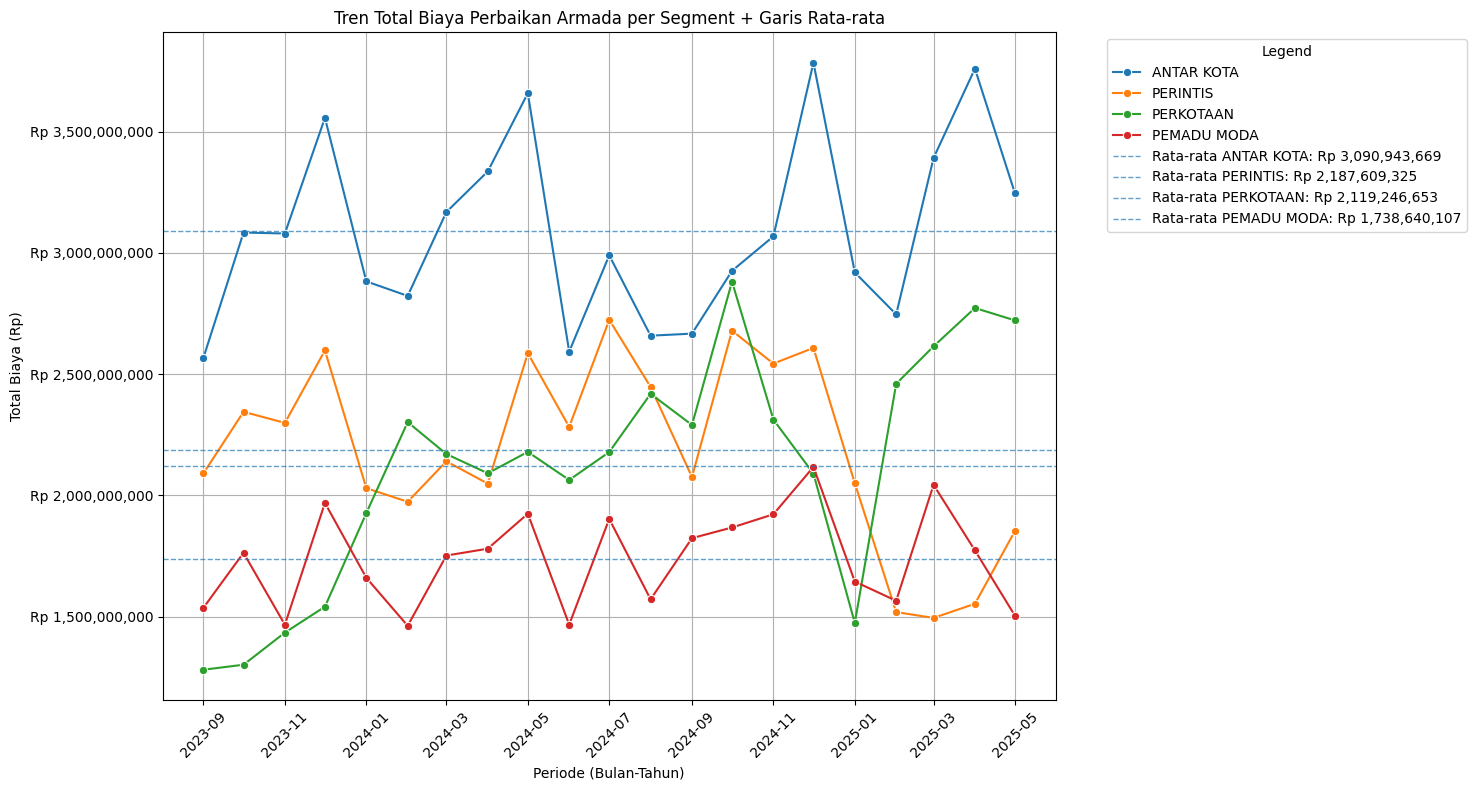

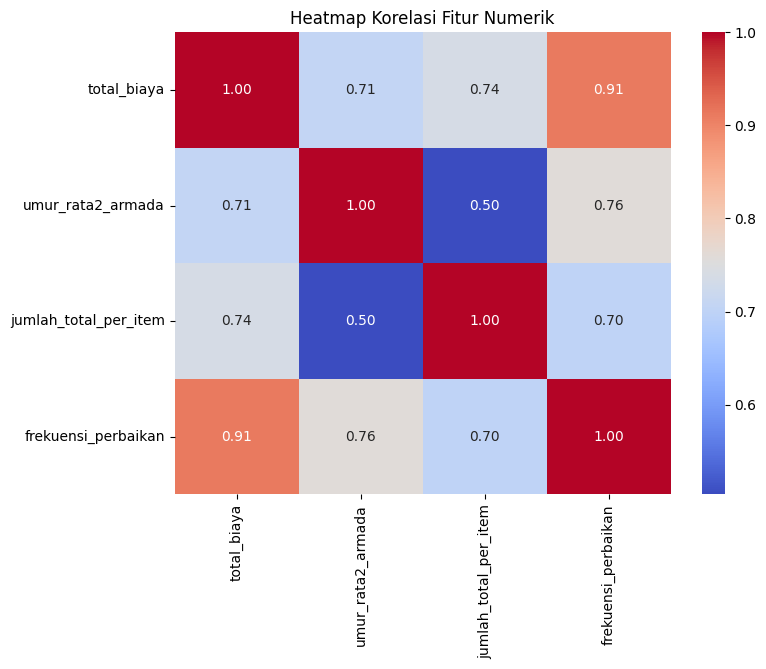

In [ ]:
# === VISUALISASI TREN BIAYA PER SEGMENT ===
segment_means = df.groupby('nm_segment')['total_biaya'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
sns.lineplot(data=df, x='periode', y='total_biaya',
             hue='nm_segment',
             hue_order=segment_means.index.tolist(),
             marker='o')

# Garis rata-rata per segmen
for seg, mean in segment_means.items():
    plt.axhline(y=mean, linestyle='--', linewidth=1, alpha=0.7,
                label=f'Rata-rata {seg}: Rp {mean:,.0f}')

plt.title('Tren Total Biaya Perbaikan Armada per Segment + Garis Rata-rata')
plt.xlabel('Periode (Bulan-Tahun)')
plt.ylabel('Total Biaya (Rp)')
plt.xticks(rotation=45)
plt.grid(True)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'Rp {x:,.0f}'))

# Legend unik
handles, labels = plt.gca().get_legend_handles_labels()
handles_unique, labels_unique = [], []
seen = set()
for h, l in zip(handles, labels):
    if l not in seen:
        handles_unique.append(h)
        labels_unique.append(l)
        seen.add(l)
plt.legend(handles_unique, labels_unique, title="Legend", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# === HEATMAP KORELASI FITUR NUMERIK ===
num_cols = ['total_biaya', 'umur_rata2_armada', 'jumlah_total_per_item', 'frekuensi_perbaikan']

plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

# PREPROCESSING + PCA

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# ========== PREPROCESSING + PCA ==========

# Fitur input dan target
X = df[['nm_segment', 'bulan', 'tahun', 'hari_besar',
        'umur_rata2_armada', 'jumlah_total_per_item', 'frekuensi_perbaikan']]
y = df['total_biaya']

# Pisahkan kolom numerik dan kategorikal
num_features = ['bulan', 'tahun', 'hari_besar',
                'umur_rata2_armada', 'jumlah_total_per_item', 'frekuensi_perbaikan']
cat_features = ['nm_segment']

# Pipeline untuk fitur numerik
numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

# Pipeline untuk fitur kategorikal
categorical_transformer = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Gabungkan preprocessor
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, num_features),
    ('cat', categorical_transformer, cat_features)
])

# Pipeline lengkap dengan PCA
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('pca', PCA(n_components=0.95))
])

# Terapkan pipeline ke fitur
X_pca = pipeline.fit_transform(X)

# Tampilkan dimensi
print(f"Dimensi awal: {X.shape}")
print(f"Dimensi setelah PCA: {X_pca.shape}")

Dimensi awal: (84, 7)
Dimensi setelah PCA: (84, 6)


# XGBoost Training + SMA Hyperparameter Tuning

In [ ]:
!pip install -U mealpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.1/149.1 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.9/397.9 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 107.0 MB/s eta 0:00:00


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from mealpy import FloatVar
from mealpy.bio_based import SMA
import numpy as np

# === SPLIT DATA (dari hasil PCA sebelumnya) ===
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# === FITNESS FUNCTION UNTUK SMA ===
def fitness_function(solution):
    n_estimators = int(solution[0])
    max_depth = int(solution[1])
    learning_rate = solution[2]

    model = XGBRegressor(
        objective='reg:squarederror',
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        random_state=42
    )

    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)
    return -scores.mean()  # MAE positif

# === DEFINISI BOUND VARIABEL ===
problem = {
    "obj_func": fitness_function,
    "bounds": FloatVar(
        lb=[50, 3, 0.01],   # [n_estimators, max_depth, learning_rate]
        ub=[500, 10, 0.3],
    ),
    "minmax": "min",
    "log_to": "console",  # bisa diubah ke None untuk non-verbose
}

# === INISIASI DAN JALANKAN OPTIMASI SMA ===
optimizer = SMA.OriginalSMA(epoch=20, pop_size=10)
results = optimizer.solve(problem)

# === TAMPILKAN HASIL OPTIMAL ===
best_params = optimizer.g_best.solution
best_score = optimizer.g_best.target.fitness

print("\n=== HASIL OPTIMASI SMA ===")
print(f"Best n_estimators  : {int(best_params[0])}")
print(f"Best max_depth     : {int(best_params[1])}")
print(f"Best learning_rate : {best_params[2]:.4f}")
print(f"Best MAE (CV)      : {best_score:.2f}")

INFO:mealpy.bio_based.SMA.OriginalSMA:OriginalSMA(epoch=20, pop_size=10, p_t=0.03)
INFO:mealpy.bio_based.SMA.OriginalSMA:>>>Problem: P, Epoch: 1, Current best: 202694986.384585, Global best: 201356541.3776416, Runtime: 7.18072 seconds
INFO:mealpy.bio_based.SMA.OriginalSMA:>>>Problem: P, Epoch: 2, Current best: 200083683.8607551, Global best: 200083683.8607551, Runtime: 3.24542 seconds
INFO:mealpy.bio_based.SMA.OriginalSMA:>>>Problem: P, Epoch: 3, Current best: 199863446.11635458, Global best: 199863446.11635458, Runtime: 3.03449 seconds
INFO:mealpy.bio_based.SMA.OriginalSMA:>>>Problem: P, Epoch: 4, Current best: 199437314.04163423, Global best: 199437314.04163423, Runtime: 2.16255 seconds
INFO:mealpy.bio_based.SMA.OriginalSMA:>>>Problem: P, Epoch: 5, Current best: 198206508.9939178, Global best: 198206508.9939178, Runtime: 5.19163 seconds
INFO:mealpy.bio_based.SMA.OriginalSMA:>>>Problem: P, Epoch: 6, Current best: 197453032.75133872, Global best: 197453032.75133872, Runtime: 1.57697 se


=== HASIL OPTIMASI SMA ===
Best n_estimators  : 309
Best max_depth     : 3
Best learning_rate : 0.2704
Best MAE (CV)      : 192183495.50


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# === LATIH FINAL MODEL DENGAN PARAMETER TERBAIK ===
best_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=309,
    max_depth=3,
    learning_rate=0.2704,
    random_state=42
)

# Latih model pada data training
best_model.fit(X_train, y_train)

# === PREDIKSI DAN EVALUASI DI DATA TEST ===
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Hitung rata-rata nilai aktual (ground truth)
mean_target = y_test.mean()

# Hitung persentase MAE dan RMSE
mae_pct = mae / mean_target * 100
rmse_pct = rmse / mean_target * 100

# === TAMPILKAN HASIL EVALUASI ===
print("=== Evaluasi Model XGBoost di Data Test ===")
print(f"MAE  : Rp {mae:,.0f} ({mae_pct:.2f}%)")
print(f"RMSE : Rp {rmse:,.0f} ({rmse_pct:.2f}%)")
print(f"R²   : {r2:.4f}")


=== Evaluasi Model XGBoost di Data Test ===
MAE  : Rp 191,299,443 (8.16%)
RMSE : Rp 234,512,541 (10.01%)
R²   : 0.8250


In [ ]:
import pandas as pd
from datetime import timedelta

# === IDENTIFIKASI BULAN TERAKHIR DI DATA ===
last_period = df['periode'].max()
last_month = last_period.month
last_year = last_period.year

# === TENTUKAN BULAN BERIKUTNYA SECARA OTOMATIS ===
if last_month == 12:
    next_month = 1
    next_year = last_year + 1
else:
    next_month = last_month + 1
    next_year = last_year

# === HITUNG RATA-RATA FITUR PER SEGMENT UNTUK INPUT PREDIKSI ===
segment_group = df[df['bulan'] == last_month].groupby('nm_segment').agg({
    'umur_rata2_armada': 'mean',
    'jumlah_total_per_item': 'mean',
    'frekuensi_perbaikan': 'mean'
}).reset_index()

# Tambahkan prediktor waktu
segment_group['bulan'] = next_month
segment_group['tahun'] = next_year
segment_group['hari_besar'] = 0  # asumsi default

# Susun urutan kolom sesuai input model
segment_group = segment_group[['nm_segment', 'bulan', 'tahun', 'hari_besar',
                               'umur_rata2_armada', 'jumlah_total_per_item', 'frekuensi_perbaikan']]

# === TRANSFORMASI FITUR DENGAN PIPELINE (OneHot + Scaler + PCA) ===
X_pred_input = pipeline.transform(segment_group)

# === PREDIKSI MENGGUNAKAN MODEL XGBOOST ===
segment_group['prediksi_biaya'] = best_model.predict(X_pred_input)

# === URUTKAN DAN TAMPILKAN HASIL ===
segment_group = segment_group.sort_values(by='prediksi_biaya', ascending=False).reset_index(drop=True)

# Tampilkan hasil di Google Colab
from IPython.display import display

print("📊 Prediksi biaya bulan depan per segmen:")
display(segment_group[['nm_segment', 'bulan', 'tahun', 'prediksi_biaya']])

# Cetak ringkas
print("Prediksi biaya bulan depan:")
print(segment_group[['nm_segment', 'prediksi_biaya']])

📊 Prediksi biaya bulan depan per segmen:


,nm_segment,bulan,tahun,prediksi_biaya
0,ANTAR KOTA,6,2025,3.485810e+09
1,PERKOTAAN,6,2025,2.582194e+09
2,PERINTIS,6,2025,2.162867e+09
3,PEMADU MODA,6,2025,1.852392e+09


Prediksi biaya bulan depan:
    nm_segment  prediksi_biaya
0   ANTAR KOTA    3.485810e+09
1    PERKOTAAN    2.582194e+09
2     PERINTIS    2.162867e+09
3  PEMADU MODA    1.852392e+09


In [ ]:
import joblib
from google.colab import files

# Simpan model
joblib.dump(best_model, '/content/xgb_model.pkl')

# Simpan pipeline preprocessing
joblib.dump(pipeline, '/content/preprocess_pipeline.pkl')

# Unduh model
files.download('/content/xgb_model.pkl')
files.download('/content/preprocess_pipeline.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Log Transform

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# === TRANSFORMASI TARGET ===
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# === LATIH MODEL PADA y YANG TELAH DILOG ===
model_log = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=69,
    max_depth=3,
    learning_rate=0.2674,
    random_state=42
)

model_log.fit(X_train, y_train_log)

# === PREDIKSI DI SKALA LOG, KEMUDIAN INVERSE (KEMBALI KE SKALA ASLI) ===
y_pred_log = model_log.predict(X_test)
y_pred = np.expm1(y_pred_log)  # balik dari log1p

# === EVALUASI DI SKALA ASLI ===
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mean_target = y_test.mean()
mae_pct = mae / mean_target * 100
rmse_pct = rmse / mean_target * 100

# === TAMPILKAN HASIL ===
print("=== Evaluasi Model XGBoost dengan Target Log-Transform ===")
print(f"MAE  : Rp {mae:,.0f} ({mae_pct:.2f}%)")
print(f"RMSE : Rp {rmse:,.0f} ({rmse_pct:.2f}%)")
print(f"R²   : {r2:.4f}")

=== Evaluasi Model XGBoost dengan Target Log-Transform ===
MAE  : Rp 214,929,087 (9.17%)
RMSE : Rp 263,585,973 (11.25%)
R²   : 0.7790
